In [3]:
reload = True
# Import des bibliothèques pour analyse
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge, LassoCV, Lasso
from sklearn.ensemble import RandomForestClassifier

import Bibliotheques.bikebiblio as bike
import Bibliotheques.ReadAndCleanDataBike as dataCleaning
if reload == True :
    df = dataCleaning.readAndClean('Datasets/Bike P(Y)TH - PARIS.csv',';')
else:
    df = dataCleaning.LoadSaved()
df.info()

#display(df.drop(columns=["nomcompteur", "idsite",'nomsite','dateinstall','photo','coord']).info())


C:\Users\yves-olivier.mukobo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\yves-olivier.mukobo\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 594554 entries, 0 to 594553
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   idcompteur         594554 non-null  object             
 1   nomcompteur        594554 non-null  object             
 2   idsite             594554 non-null  float64            
 3   nomsite            594554 non-null  object             
 4   comptagehoraire    594554 non-null  float64            
 5   dateheurecomptage  594554 non-null  datetime64[ns, UTC]
 6   dateinstall        594554 non-null  datetime64[ns]     
 7   photo              594554 non-null  object             
 8   coord              594554 non-null  object             
 9   date               594554 non-null  object             
 10  datemois           594554 non-null  period[M]          
 11  year               594554 non-null  float64            
 12  day                594554 non-

In [9]:
df_pertinente = df.drop(columns=["nomcompteur", "idsite",'nomsite','dateinstall','photo','coord','year','day','weekofyear','lat','long'
                                ,'arrondissement','jourdelasemaine','mois'])
df_pertinente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594554 entries, 0 to 594553
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         594554 non-null  int64  
 1   idcompteur         594554 non-null  object 
 2   comptagehoraire    594554 non-null  float64
 3   dateheurecomptage  594554 non-null  object 
 4   date               594554 non-null  object 
 5   weekday            594554 non-null  float64
 6   month              594554 non-null  float64
 7   hour               594554 non-null  float64
 8   numidcompteur      594554 non-null  int64  
 9   jourdegreve        594554 non-null  int64  
 10  meteo              594554 non-null  int64  
 11  meteo_cat          594554 non-null  object 
 12  holiday            594554 non-null  int64  
 13  vacances_zone_c    594554 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 63.5+ MB


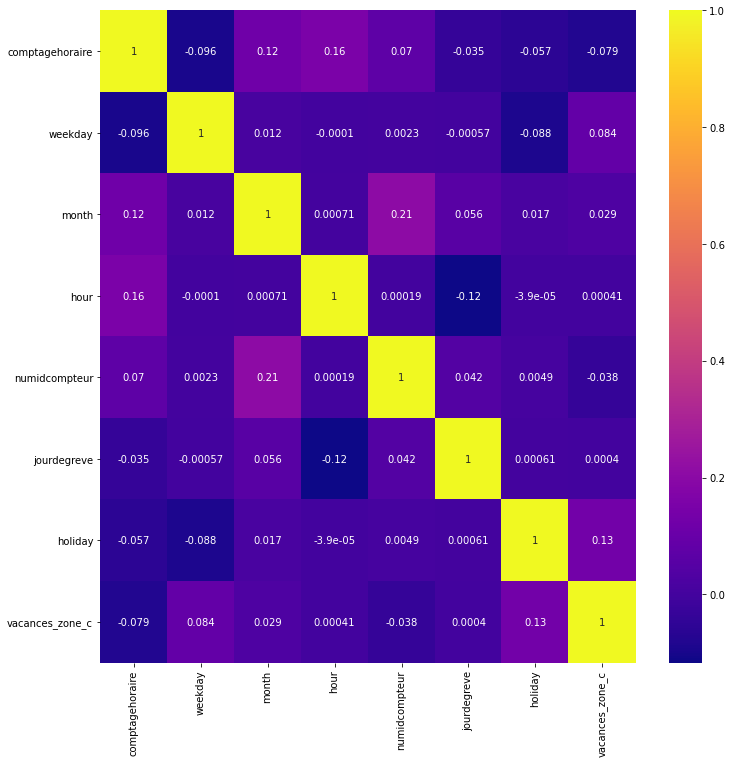

In [11]:
# Affichage de la heat map des corrélations de toutes les variables qualitatives de df
dfcor = df_pertinente.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dfcor, annot= True, ax= ax, cmap="plasma");

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594554 entries, 0 to 594553
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   idcompteur              594554 non-null  object             
 1   nomcompteur             594554 non-null  object             
 2   idsite                  594554 non-null  float64            
 3   nomsite                 594554 non-null  object             
 4   comptagehoraire         594554 non-null  float64            
 5   dateheurecomptage       594554 non-null  datetime64[ns, UTC]
 6   dateinstall             594554 non-null  datetime64[ns]     
 7   photo                   594554 non-null  object             
 8   coord                   594554 non-null  object             
 9   date                    594554 non-null  object             
 10  year                    594554 non-null  float64            
 11  day                     59

None

,mois,comptagehoraire,month
4,Janvier,26.873155,1.0
3,Février,30.809625,2.0
8,Mars,31.437755,3.0
1,Avril,35.419327,4.0
7,Mai,34.562306,5.0
6,Juin,36.889876,6.0
5,Juillet,41.358161,7.0
0,Août,30.729305,8.0
11,Septembre,50.733956,9.0
10,Octobre,46.849424,10.0


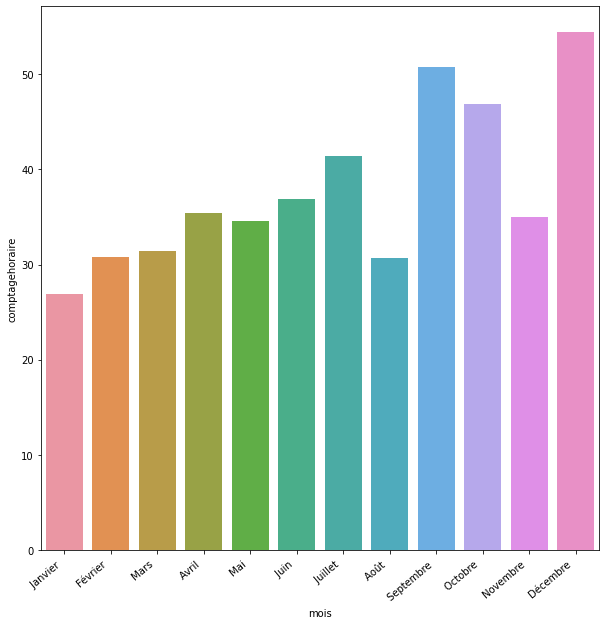

In [61]:
display(df.info())
functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.mean(),
    'month' : lambda month: month.mean()
    }

df4 = df.groupby('mois',as_index = False).agg(functions_to_apply)
df4 = df4.sort_values(by='month', ascending=True)
    
display(df4)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df4.mois, y=df4["comptagehoraire"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

,jourdelasemaine,comptagehoraire,weekday
2,Lundi,42.129940,0.0
3,Mardi,44.029717,1.0
4,Mercredi,43.495962,2.0
1,Jeudi,45.377361,3.0
6,Vendredi,43.390700,4.0
5,Samedi,30.612552,5.0
0,Dimanche,25.546292,6.0


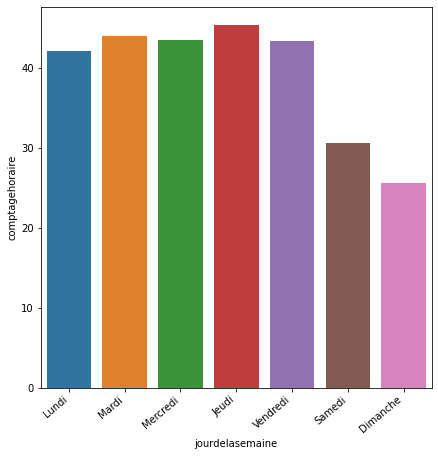

In [64]:
functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.mean(),
    'weekday' : lambda weekday: weekday.mean()
    }

df4 = df.groupby('jourdelasemaine',as_index = False).agg(functions_to_apply)
df4 = df4.sort_values(by='weekday', ascending=True)
    
display(df4)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df4.jourdelasemaine, y=df4["comptagehoraire"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

,hour,comptagehoraire
0,0.0,6.357520
1,1.0,3.956576
2,2.0,2.603738
3,3.0,2.991079
4,4.0,5.868330
5,5.0,17.384960
6,6.0,54.611286
7,7.0,82.013764
8,8.0,61.886211
9,9.0,40.516953


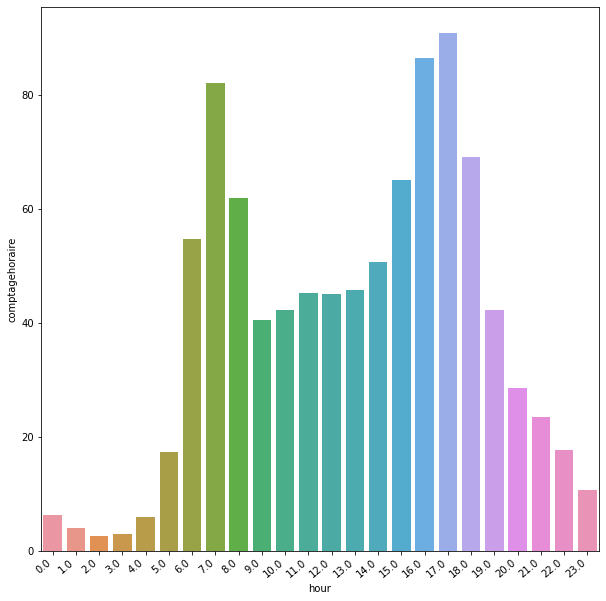

In [65]:
functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.mean()
    }

df4 = df.groupby('hour',as_index = False).agg(functions_to_apply)
df4 = df4.sort_values(by='hour', ascending=True)
    
display(df4)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df4.hour, y=df4["comptagehoraire"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

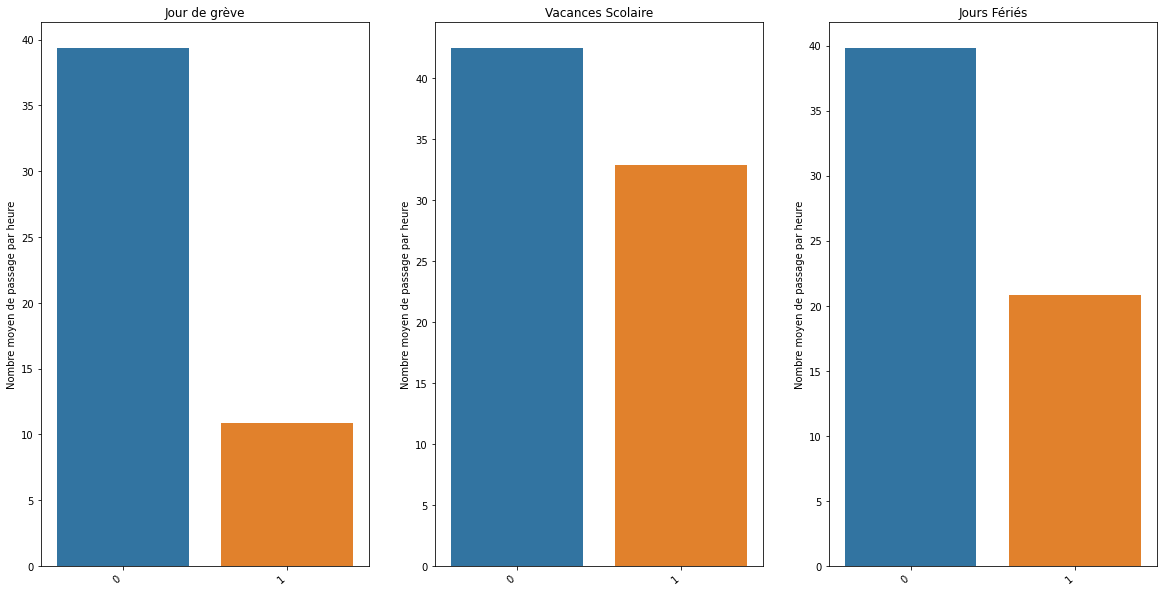

In [22]:
functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.mean()
    }
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
dfgrev = df.groupby('jourdegreve',as_index = False).agg(functions_to_apply)
    
sns.barplot(x=dfgrev.jourdegreve, y=dfgrev["comptagehoraire"], ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right");
ax1.set_title("Jour de grève")
ax1.set_ylabel('Nombre moyen de passage par heure')
ax1.set_xlabel('')

functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.mean()
    }
dfvacances = df.groupby('vacances_zone_c',as_index = False).agg(functions_to_apply)    
sns.barplot(x=dfvacances.vacances_zone_c, y=dfvacances["comptagehoraire"], ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title("Vacances Scolaire")
ax2.set_ylabel('Nombre moyen de passage par heure')
ax2.set_xlabel('')

functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.mean()
    }

dfferie = df.groupby('holiday',as_index = False).agg(functions_to_apply)
    
sns.barplot(x=dfferie.holiday, y=dfferie["comptagehoraire"], ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.set_title("Jours Fériés")
ax3.set_ylabel('Nombre moyen de passage par heure')
ax3.set_xlabel('')


plt.show()

,vacances_zone_c,comptagehoraire
0,0,42.431688
1,1,32.828979


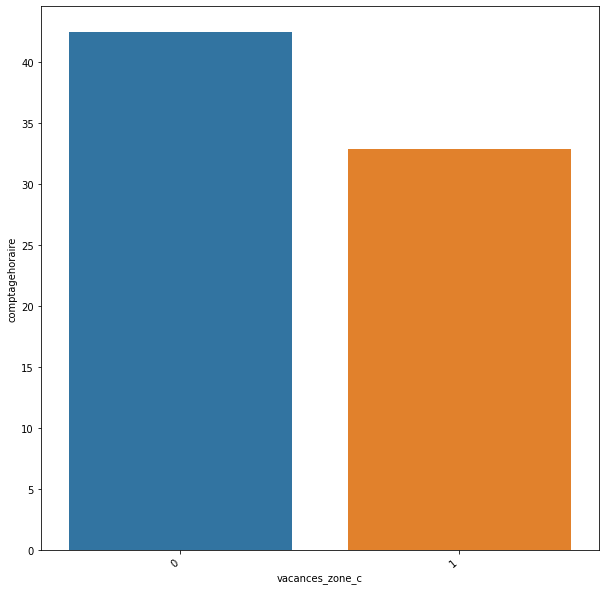

In [69]:
functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.mean()
    }

df4 = df.groupby('vacances_zone_c',as_index = False).agg(functions_to_apply)
    
display(df4)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df4.vacances_zone_c, y=df4["comptagehoraire"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right"); 

,holiday,comptagehoraire
0,0,39.784988
1,1,20.793892


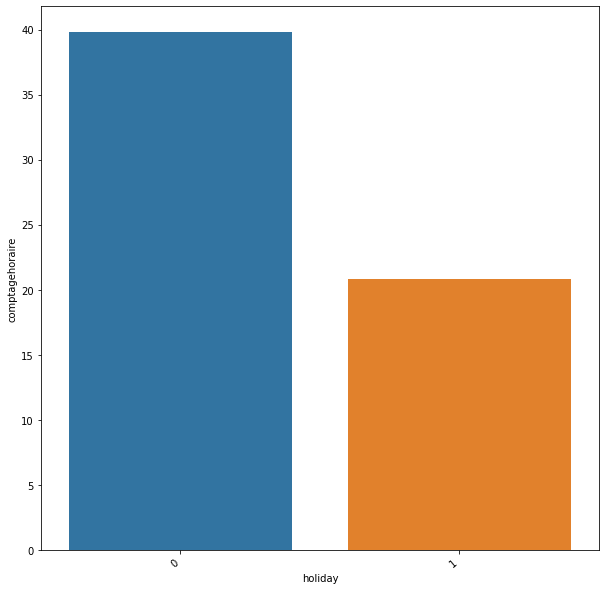

In [70]:
functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.mean()
    }

df4 = df.groupby('holiday',as_index = False).agg(functions_to_apply)
    
display(df4)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df4.holiday, y=df4["comptagehoraire"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right"); 